In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [4]:
XT=pd.read_csv("x_train.csv")
YT=pd.read_csv("y_train.csv")

In [6]:
XT.shape


(1257, 1)

In [7]:
YT.shape


(1257, 1)

In [8]:
Xt=pd.read_csv("x_test.csv")

In [9]:
Xt.shape

(19, 1)

In [10]:
sc=MinMaxScaler(feature_range=(0,1))

In [11]:
XT=sc.fit_transform(XT)
YT=sc.transform(YT)

In [12]:
XT=np.array(XT)

In [132]:
XT=XT.reshape(XT.shape[0],XT.shape[1],1)

In [142]:
model = Sequential()
model.add(LSTM(32,input_shape=(1,1)))
model.add(Dense(1))
model.add(Activation('softmax'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

model.add(LSTM(100, input_shape= (100,4), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_19 (Activation)   (None, 1)                 0         
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [143]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint("model.h5",monitor='val_loss',verbose=True,save_best_only=True)

In [144]:
hist=model.fit(XT,YT,epochs=200,callbacks=[checkpoint])

Epoch 1/200
1257/1257 [==============================] - 2s 1ms/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 2/200
1257/1257 [==============================] - 0s 204us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 3/200
1257/1257 [==============================] - 0s 206us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 4/200
1257/1257 [==============================] - 0s 202us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 5/200
1257/1257 [==============================] - 0s 201us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 6/200
1257/1257 [==============================] - 0s 204us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 7/200
1257/1257 [==============================] - 0s 198us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 8/200
1257/1257 [==============================] - 0s 215us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 9/200
1257/1257 [==============================] - 0s 193us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 10/200
1257/125

1257/1257 [==============================] - 1s 403us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 75/200
1257/1257 [==============================] - 0s 244us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 76/200
1257/1257 [==============================] - 0s 246us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 77/200
1257/1257 [==============================] - 0s 256us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 78/200
1257/1257 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 8.6806e- - 0s 238us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 79/200
1257/1257 [==============================] - 0s 231us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 80/200
1257/1257 [==============================] - 0s 247us/step - loss: 0.3523 - accuracy: 7.9554e-040s - loss: 0.3717 - accuracy: 
Epoch 81/200
1257/1257 [==============================] - 0s 259us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 82/200
1257/1257 [==============================] -

1257/1257 [==============================] - 0s 198us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 147/200
1257/1257 [==============================] - 0s 187us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 148/200
1257/1257 [==============================] - 0s 193us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 149/200
1257/1257 [==============================] - 0s 188us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 150/200
1257/1257 [==============================] - 0s 196us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 151/200
1257/1257 [==============================] - 0s 190us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 152/200
1257/1257 [==============================] - 0s 178us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 153/200
1257/1257 [==============================] - 0s 198us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 154/200
1257/1257 [==============================] - 0s 169us/step - loss: 0.3523 - accuracy: 7.9554e-04
Epoch 155/200
1

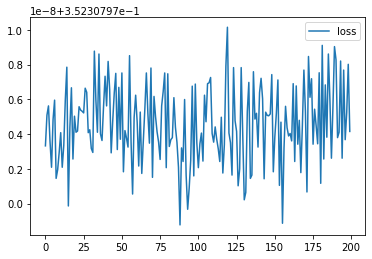

In [145]:
train_loss=hist.history["loss"]
plt.plot(train_loss,label="loss")

plt.legend()
plt.show()

In [89]:
model.load_weights("model.h5")

In [91]:
model.evaluate(XT,YT)

1257/1257 [==============================] - 0s 108us/step


[0.3523079753003558, 0.0007955449400469661]

In [92]:
sc1=MinMaxScaler(feature_range=(0,1))

In [93]:
Xt=sc1.fit_transform(Xt)

In [94]:
Xt=np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1],1)

In [95]:
Xt.shape

(19, 1, 1)

In [96]:
p=model.predict(Xt)

In [97]:

p=sc1.inverse_transform(p)

In [98]:
p

array([[841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995],
       [841.94995]], dtype=float32)

In [100]:
p.shape

(19, 1)

In [101]:
pred=pd.DataFrame(p,columns=["High"])

In [103]:
pred

,High
0,841.949951
1,841.949951
2,841.949951
3,841.949951
4,841.949951
5,841.949951
6,841.949951
7,841.949951
8,841.949951
9,841.949951


In [104]:
pred.to_csv("pred.csv",index=False)